# 순환신경망 RNN : Recurrent Neural Network
CNN 과 딥러닝의 양대 산맥을 이루는 신경망
대표적으로 음성을 인식하거나, 문장을 번역하는데 사용하며
주식,온도,매출과 같이 시간이 지남에 따라 변화하는 데이터(시계열)를 활용하여 미래 주식 종가,날씨,상점 매출을 예측 가능

대표적인 4개 층
- Embedding
- SimpleRNN
- LSTM
- Conv

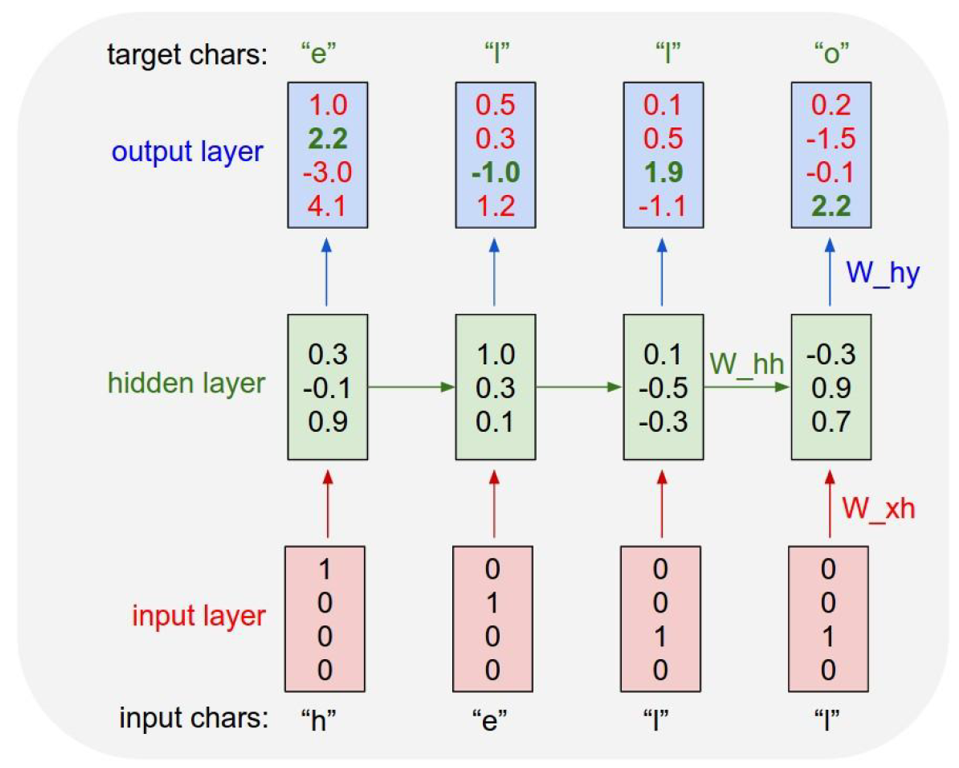

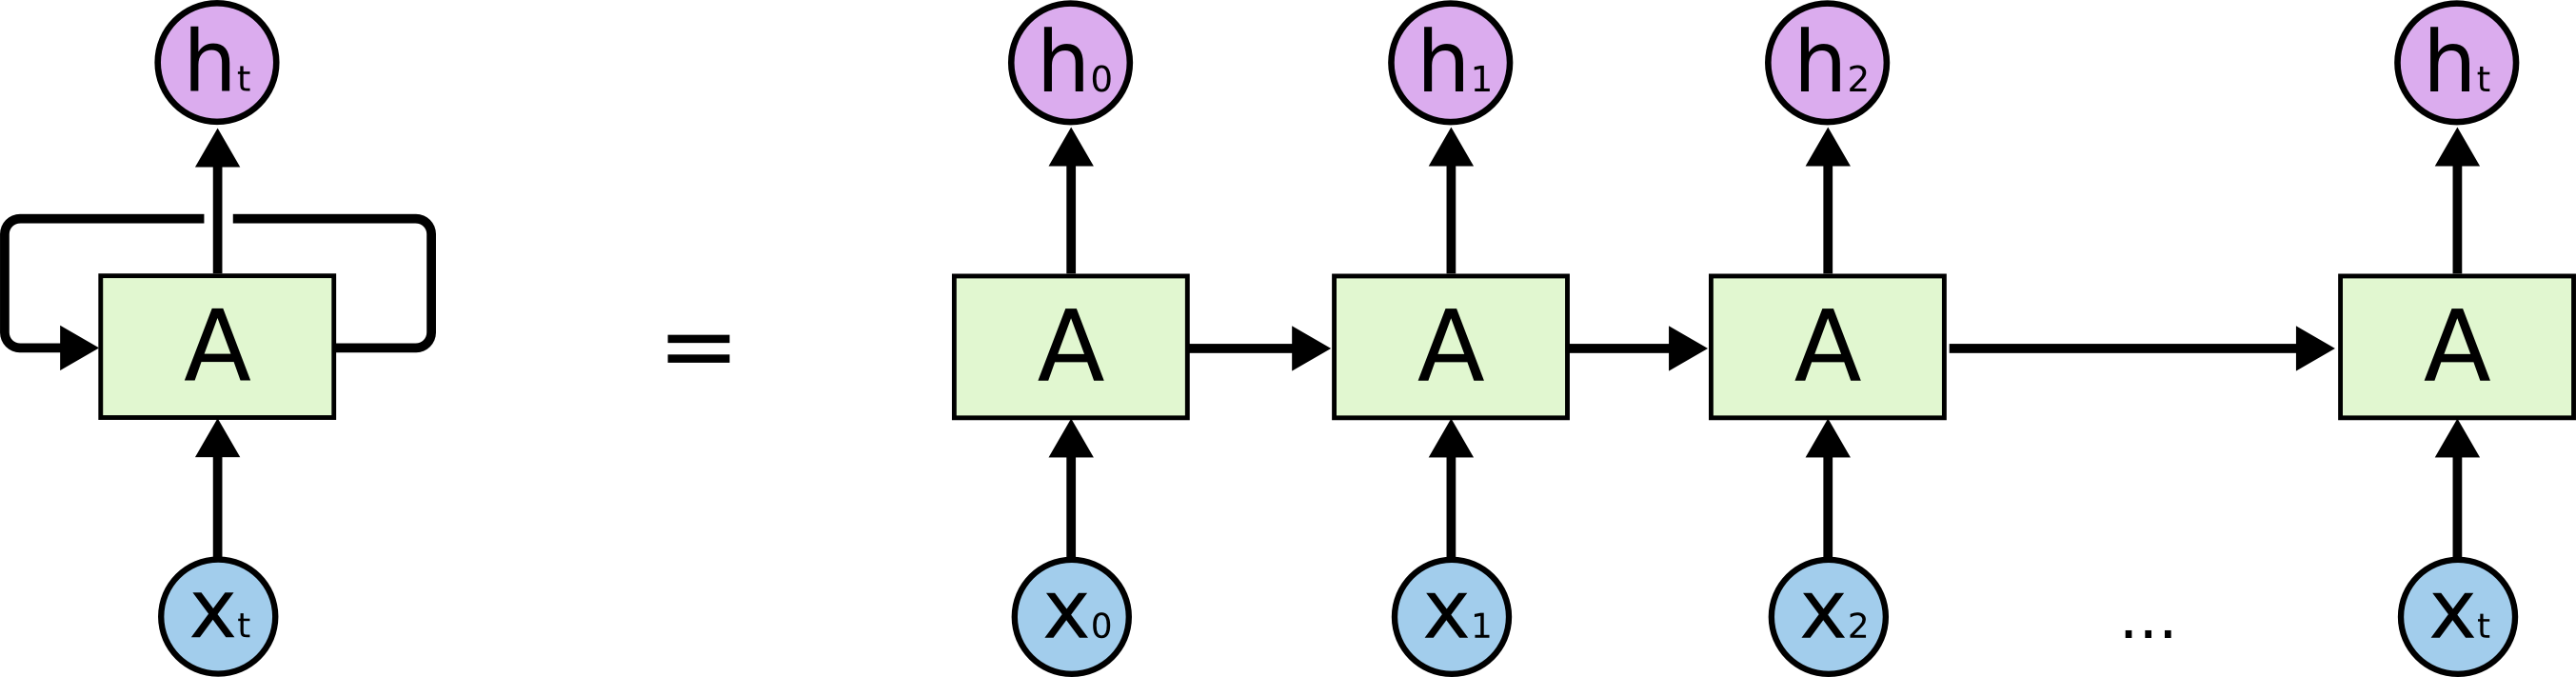

## 토큰화 작업 수행

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


texts= ['You are the Best','You are the Nice']



# 최대 단어 개수 지정, texts안에 주어진 문장에 포함되지 않은 단어가 존재할 경우 
# oov_token에 <OOV> (out of vocabulary) 단어로 대체하여 저장
tokenizer = Tokenizer(num_words=10, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)


#텍스트 데이터를 정수 인덱스 형태로 변환
sequences = tokenizer.texts_to_sequences(texts)

#이진형태로 인코딩
binary_results = tokenizer.sequences_to_matrix(sequences, mode ='binary')

print(tokenizer.word_index)
print('------------------------------------------------------------------')

print(f'sequence:{sequences}\n')
print(f'binary_vectors: \n {binary_results}\n')


#원-핫 코딩
print('one hot vector: \n',to_categorical(sequences))


test_text= ['You are the One']
test_seq= tokenizer.texts_to_sequences(test_text)

print(f'\n test sequences:{test_seq}')



{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
------------------------------------------------------------------
sequence:[[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors: 
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

one hot vector: 
 [[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]

 test sequences:[[2, 3, 4, 1]]


# IMDB 데이터 셋 이용하여 Embedding 층 사용하기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = num_words)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\negga\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\negga\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

0

In [3]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_train.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
print(X_train[0])
print('------------------------------------------------------------------')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
------------------------------------------------------------

In [5]:
imdb_get_word_index = {}

for key,value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
    


In [6]:
for i in range(len(imdb_get_word_index)):
    print('{}번째로 가장 많이 쓰인 단어 = {}'.format(i+1,imdb_get_word_index[i+1]))

1번째로 가장 많이 쓰인 단어 = the
2번째로 가장 많이 쓰인 단어 = and
3번째로 가장 많이 쓰인 단어 = a
4번째로 가장 많이 쓰인 단어 = of
5번째로 가장 많이 쓰인 단어 = to
6번째로 가장 많이 쓰인 단어 = is
7번째로 가장 많이 쓰인 단어 = br
8번째로 가장 많이 쓰인 단어 = in
9번째로 가장 많이 쓰인 단어 = it
10번째로 가장 많이 쓰인 단어 = i
11번째로 가장 많이 쓰인 단어 = this
12번째로 가장 많이 쓰인 단어 = that
13번째로 가장 많이 쓰인 단어 = was
14번째로 가장 많이 쓰인 단어 = as
15번째로 가장 많이 쓰인 단어 = for
16번째로 가장 많이 쓰인 단어 = with
17번째로 가장 많이 쓰인 단어 = movie
18번째로 가장 많이 쓰인 단어 = but
19번째로 가장 많이 쓰인 단어 = film
20번째로 가장 많이 쓰인 단어 = on
21번째로 가장 많이 쓰인 단어 = not
22번째로 가장 많이 쓰인 단어 = you
23번째로 가장 많이 쓰인 단어 = are
24번째로 가장 많이 쓰인 단어 = his
25번째로 가장 많이 쓰인 단어 = have
26번째로 가장 많이 쓰인 단어 = he
27번째로 가장 많이 쓰인 단어 = be
28번째로 가장 많이 쓰인 단어 = one
29번째로 가장 많이 쓰인 단어 = all
30번째로 가장 많이 쓰인 단어 = at
31번째로 가장 많이 쓰인 단어 = by
32번째로 가장 많이 쓰인 단어 = an
33번째로 가장 많이 쓰인 단어 = they
34번째로 가장 많이 쓰인 단어 = who
35번째로 가장 많이 쓰인 단어 = so
36번째로 가장 많이 쓰인 단어 = from
37번째로 가장 많이 쓰인 단어 = like
38번째로 가장 많이 쓰인 단어 = her
39번째로 가장 많이 쓰인 단어 = or
40번째로 가장 많이 쓰인 단어 = just
41번째로 가장 많이 쓰인 단어 = about
42번째로 가장 많이 쓰인 단어 = it's
43번째로 

1929번째로 가장 많이 쓰인 단어 = kinda
1930번째로 가장 많이 쓰인 단어 = wind
1931번째로 가장 많이 쓰인 단어 = tarzan
1932번째로 가장 많이 쓰인 단어 = cage
1933번째로 가장 많이 쓰인 단어 = hits
1934번째로 가장 많이 쓰인 단어 = loss
1935번째로 가장 많이 쓰인 단어 = today's
1936번째로 가장 많이 쓰인 단어 = monsters
1937번째로 가장 많이 쓰인 단어 = youth
1938번째로 가장 많이 쓰인 단어 = sing
1939번째로 가장 많이 쓰인 단어 = numerous
1940번째로 가장 많이 쓰인 단어 = partner
1941번째로 가장 많이 쓰인 단어 = conflict
1942번째로 가장 많이 쓰인 단어 = whenever
1943번째로 가장 많이 쓰인 단어 = humanity
1944번째로 가장 많이 쓰인 단어 = concerned
1945번째로 가장 많이 쓰인 단어 = pretentious
1946번째로 가장 많이 쓰인 단어 = fate
1947번째로 가장 많이 쓰인 단어 = singer
1948번째로 가장 많이 쓰인 단어 = dealing
1949번째로 가장 많이 쓰인 단어 = mike
1950번째로 가장 많이 쓰인 단어 = driving
1951번째로 가장 많이 쓰인 단어 = jesus
1952번째로 가장 많이 쓰인 단어 = private
1953번째로 가장 많이 쓰인 단어 = talents
1954번째로 가장 많이 쓰인 단어 = discovered
1955번째로 가장 많이 쓰인 단어 = naturally
1956번째로 가장 많이 쓰인 단어 = skills
1957번째로 가장 많이 쓰인 단어 = unfunny
1958번째로 가장 많이 쓰인 단어 = opposite
1959번째로 가장 많이 쓰인 단어 = finale
1960번째로 가장 많이 쓰인 단어 = bigger
1961번째로 가장 많이 쓰인 단어 = v
1962번째로 가장 많이 쓰인 단어 = ann
1963번

3428번째로 가장 많이 쓰인 단어 = stated
3429번째로 가장 많이 쓰인 단어 = chances
3430번째로 가장 많이 쓰인 단어 = shall
3431번째로 가장 많이 쓰인 단어 = brand
3432번째로 가장 많이 쓰인 단어 = exercise
3433번째로 가장 많이 쓰인 단어 = university
3434번째로 가장 많이 쓰인 단어 = increasingly
3435번째로 가장 많이 쓰인 단어 = row
3436번째로 가장 많이 쓰인 단어 = disagree
3437번째로 가장 많이 쓰인 단어 = cardboard
3438번째로 가장 많이 쓰인 단어 = winter
3439번째로 가장 많이 쓰인 단어 = comics
3440번째로 가장 많이 쓰인 단어 = requires
3441번째로 가장 많이 쓰인 단어 = dropped
3442번째로 가장 많이 쓰인 단어 = associated
3443번째로 가장 많이 쓰인 단어 = world's
3444번째로 가장 많이 쓰인 단어 = chuck
3445번째로 가장 많이 쓰인 단어 = iii
3446번째로 가장 많이 쓰인 단어 = medium
3447번째로 가장 많이 쓰인 단어 = bush
3448번째로 가장 많이 쓰인 단어 = projects
3449번째로 가장 많이 쓰인 단어 = bride
3450번째로 가장 많이 쓰인 단어 = occurs
3451번째로 가장 많이 쓰인 단어 = korean
3452번째로 가장 많이 쓰인 단어 = inevitable
3453번째로 가장 많이 쓰인 단어 = messages
3454번째로 가장 많이 쓰인 단어 = brando
3455번째로 가장 많이 쓰인 단어 = le
3456번째로 가장 많이 쓰인 단어 = strike
3457번째로 가장 많이 쓰인 단어 = poverty
3458번째로 가장 많이 쓰인 단어 = forgive
3459번째로 가장 많이 쓰인 단어 = performing
3460번째로 가장 많이 쓰인 단어 = stiff
3461번째로 가장 많이 쓰인 단어 

5928번째로 가장 많이 쓰인 단어 = handles
5929번째로 가장 많이 쓰인 단어 = hides
5930번째로 가장 많이 쓰인 단어 = wanders
5931번째로 가장 많이 쓰인 단어 = dudley
5932번째로 가장 많이 쓰인 단어 = accurately
5933번째로 가장 많이 쓰인 단어 = duration
5934번째로 가장 많이 쓰인 단어 = hum
5935번째로 가장 많이 쓰인 단어 = harrison
5936번째로 가장 많이 쓰인 단어 = damaged
5937번째로 가장 많이 쓰인 단어 = satirical
5938번째로 가장 많이 쓰인 단어 = 1950
5939번째로 가장 많이 쓰인 단어 = minority
5940번째로 가장 많이 쓰인 단어 = suggestion
5941번째로 가장 많이 쓰인 단어 = insightful
5942번째로 가장 많이 쓰인 단어 = hangs
5943번째로 가장 많이 쓰인 단어 = btw
5944번째로 가장 많이 쓰인 단어 = preferred
5945번째로 가장 많이 쓰인 단어 = sorely
5946번째로 가장 많이 쓰인 단어 = windows
5947번째로 가장 많이 쓰인 단어 = formed
5948번째로 가장 많이 쓰인 단어 = profession
5949번째로 가장 많이 쓰인 단어 = boy's
5950번째로 가장 많이 쓰인 단어 = commenting
5951번째로 가장 많이 쓰인 단어 = newer
5952번째로 가장 많이 쓰인 단어 = landed
5953번째로 가장 많이 쓰인 단어 = colin
5954번째로 가장 많이 쓰인 단어 = tenant
5955번째로 가장 많이 쓰인 단어 = goers
5956번째로 가장 많이 쓰인 단어 = gunga
5957번째로 가장 많이 쓰인 단어 = uniformly
5958번째로 가장 많이 쓰인 단어 = neurotic
5959번째로 가장 많이 쓰인 단어 = trials
5960번째로 가장 많이 쓰인 단어 = authorities
5961번째로 가장 많

7427번째로 가장 많이 쓰인 단어 = unclear
7428번째로 가장 많이 쓰인 단어 = kells
7429번째로 가장 많이 쓰인 단어 = tightly
7430번째로 가장 많이 쓰인 단어 = existing
7431번째로 가장 많이 쓰인 단어 = du
7432번째로 가장 많이 쓰인 단어 = entrance
7433번째로 가장 많이 쓰인 단어 = offend
7434번째로 가장 많이 쓰인 단어 = goldie
7435번째로 가장 많이 쓰인 단어 = guardian
7436번째로 가장 많이 쓰인 단어 = collins
7437번째로 가장 많이 쓰인 단어 = targeted
7438번째로 가장 많이 쓰인 단어 = talky
7439번째로 가장 많이 쓰인 단어 = extensive
7440번째로 가장 많이 쓰인 단어 = ny
7441번째로 가장 많이 쓰인 단어 = benefits
7442번째로 가장 많이 쓰인 단어 = epics
7443번째로 가장 많이 쓰인 단어 = pilots
7444번째로 가장 많이 쓰인 단어 = payoff
7445번째로 가장 많이 쓰인 단어 = stadium
7446번째로 가장 많이 쓰인 단어 = october
7447번째로 가장 많이 쓰인 단어 = stake
7448번째로 가장 많이 쓰인 단어 = characterisation
7449번째로 가장 많이 쓰인 단어 = applied
7450번째로 가장 많이 쓰인 단어 = applies
7451번째로 가장 많이 쓰인 단어 = pivotal
7452번째로 가장 많이 쓰인 단어 = lowe
7453번째로 가장 많이 쓰인 단어 = gathering
7454번째로 가장 많이 쓰인 단어 = marisa
7455번째로 가장 많이 쓰인 단어 = brent
7456번째로 가장 많이 쓰인 단어 = upcoming
7457번째로 가장 많이 쓰인 단어 = 1963
7458번째로 가장 많이 쓰인 단어 = overbearing
7459번째로 가장 많이 쓰인 단어 = eli
7460번째로 가장 많이 쓰인 단어 = 

10368번째로 가장 많이 쓰인 단어 = textbook
10369번째로 가장 많이 쓰인 단어 = ivan
10370번째로 가장 많이 쓰인 단어 = tomato
10371번째로 가장 많이 쓰인 단어 = lowered
10372번째로 가장 많이 쓰인 단어 = hindsight
10373번째로 가장 많이 쓰인 단어 = posed
10374번째로 가장 많이 쓰인 단어 = palpable
10375번째로 가장 많이 쓰인 단어 = hilliard
10376번째로 가장 많이 쓰인 단어 = jerks
10377번째로 가장 많이 쓰인 단어 = stylistic
10378번째로 가장 많이 쓰인 단어 = complexities
10379번째로 가장 많이 쓰인 단어 = crispin
10380번째로 가장 많이 쓰인 단어 = fluffy
10381번째로 가장 많이 쓰인 단어 = censored
10382번째로 가장 많이 쓰인 단어 = prestigious
10383번째로 가장 많이 쓰인 단어 = poignancy
10384번째로 가장 많이 쓰인 단어 = distributors
10385번째로 가장 많이 쓰인 단어 = predicament
10386번째로 가장 많이 쓰인 단어 = annoys
10387번째로 가장 많이 쓰인 단어 = gomez
10388번째로 가장 많이 쓰인 단어 = noticing
10389번째로 가장 많이 쓰인 단어 = declare
10390번째로 가장 많이 쓰인 단어 = distraught
10391번째로 가장 많이 쓰인 단어 = danced
10392번째로 가장 많이 쓰인 단어 = repertoire
10393번째로 가장 많이 쓰인 단어 = elegance
10394번째로 가장 많이 쓰인 단어 = piper
10395번째로 가장 많이 쓰인 단어 = conceit
10396번째로 가장 많이 쓰인 단어 = plods
10397번째로 가장 많이 쓰인 단어 = math
10398번째로 가장 많이 쓰인 단어 = dripped
10399번째로 가장 많이 쓰인 단어 = 

11426번째로 가장 많이 쓰인 단어 = wimpy
11427번째로 가장 많이 쓰인 단어 = blurry
11428번째로 가장 많이 쓰인 단어 = gandalf
11429번째로 가장 많이 쓰인 단어 = criticizing
11430번째로 가장 많이 쓰인 단어 = mordrid
11431번째로 가장 많이 쓰인 단어 = sting
11432번째로 가장 많이 쓰인 단어 = troupe
11433번째로 가장 많이 쓰인 단어 = external
11434번째로 가장 많이 쓰인 단어 = committee
11435번째로 가장 많이 쓰인 단어 = hallways
11436번째로 가장 많이 쓰인 단어 = singin'
11437번째로 가장 많이 쓰인 단어 = mastery
11438번째로 가장 많이 쓰인 단어 = robocop
11439번째로 가장 많이 쓰인 단어 = vulgarity
11440번째로 가장 많이 쓰인 단어 = nevada
11441번째로 가장 많이 쓰인 단어 = slutty
11442번째로 가장 많이 쓰인 단어 = radioactive
11443번째로 가장 많이 쓰인 단어 = praises
11444번째로 가장 많이 쓰인 단어 = strangler
11445번째로 가장 많이 쓰인 단어 = dunaway
11446번째로 가장 많이 쓰인 단어 = overact
11447번째로 가장 많이 쓰인 단어 = denominator
11448번째로 가장 많이 쓰인 단어 = 1947
11449번째로 가장 많이 쓰인 단어 = rhymes
11450번째로 가장 많이 쓰인 단어 = caribbean
11451번째로 가장 많이 쓰인 단어 = miniature
11452번째로 가장 많이 쓰인 단어 = london's
11453번째로 가장 많이 쓰인 단어 = lad
11454번째로 가장 많이 쓰인 단어 = yada
11455번째로 가장 많이 쓰인 단어 = diva
11456번째로 가장 많이 쓰인 단어 = rooker
11457번째로 가장 많이 쓰인 단어 = lillian
11458번

14426번째로 가장 많이 쓰인 단어 = minion
14427번째로 가장 많이 쓰인 단어 = unacceptable
14428번째로 가장 많이 쓰인 단어 = bordering
14429번째로 가장 많이 쓰인 단어 = equipped
14430번째로 가장 많이 쓰인 단어 = ambient
14431번째로 가장 많이 쓰인 단어 = lennon's
14432번째로 가장 많이 쓰인 단어 = popeye
14433번째로 가장 많이 쓰인 단어 = nagra
14434번째로 가장 많이 쓰인 단어 = decor
14435번째로 가장 많이 쓰인 단어 = occupy
14436번째로 가장 많이 쓰인 단어 = disappointingly
14437번째로 가장 많이 쓰인 단어 = catastrophic
14438번째로 가장 많이 쓰인 단어 = kudrow
14439번째로 가장 많이 쓰인 단어 = hsiao
14440번째로 가장 많이 쓰인 단어 = tavern
14441번째로 가장 많이 쓰인 단어 = unharmed
14442번째로 가장 많이 쓰인 단어 = hotter
14443번째로 가장 많이 쓰인 단어 = purity
14444번째로 가장 많이 쓰인 단어 = wistful
14445번째로 가장 많이 쓰인 단어 = selves
14446번째로 가장 많이 쓰인 단어 = bilko
14447번째로 가장 많이 쓰인 단어 = hastily
14448번째로 가장 많이 쓰인 단어 = famine
14449번째로 가장 많이 쓰인 단어 = kahn
14450번째로 가장 많이 쓰인 단어 = hauntingly
14451번째로 가장 많이 쓰인 단어 = cartwright
14452번째로 가장 많이 쓰인 단어 = unsolved
14453번째로 가장 많이 쓰인 단어 = hoodlums
14454번째로 가장 많이 쓰인 단어 = sonia
14455번째로 가장 많이 쓰인 단어 = figuratively
14456번째로 가장 많이 쓰인 단어 = winfrey
14457번째로 가장 많이 쓰인 단어 = ol

15925번째로 가장 많이 쓰인 단어 = undergoes
15926번째로 가장 많이 쓰인 단어 = notoriously
15927번째로 가장 많이 쓰인 단어 = genetically
15928번째로 가장 많이 쓰인 단어 = trends
15929번째로 가장 많이 쓰인 단어 = thunderbird
15930번째로 가장 많이 쓰인 단어 = diminished
15931번째로 가장 많이 쓰인 단어 = prophecies
15932번째로 가장 많이 쓰인 단어 = carriage
15933번째로 가장 많이 쓰인 단어 = naturalism
15934번째로 가장 많이 쓰인 단어 = spouses
15935번째로 가장 많이 쓰인 단어 = villages
15936번째로 가장 많이 쓰인 단어 = sheryl
15937번째로 가장 많이 쓰인 단어 = jester
15938번째로 가장 많이 쓰인 단어 = marky
15939번째로 가장 많이 쓰인 단어 = neighbor's
15940번째로 가장 많이 쓰인 단어 = gamble
15941번째로 가장 많이 쓰인 단어 = 'real'
15942번째로 가장 많이 쓰인 단어 = quotient
15943번째로 가장 많이 쓰인 단어 = mvp
15944번째로 가장 많이 쓰인 단어 = utilizes
15945번째로 가장 많이 쓰인 단어 = escapades
15946번째로 가장 많이 쓰인 단어 = platinum
15947번째로 가장 많이 쓰인 단어 = priced
15948번째로 가장 많이 쓰인 단어 = infused
15949번째로 가장 많이 쓰인 단어 = nepotism
15950번째로 가장 많이 쓰인 단어 = anachronistic
15951번째로 가장 많이 쓰인 단어 = biographies
15952번째로 가장 많이 쓰인 단어 = likelihood
15953번째로 가장 많이 쓰인 단어 = pedigree
15954번째로 가장 많이 쓰인 단어 = arabia
15955번째로 가장 많이 쓰인 단어 = spout
15956번

18425번째로 가장 많이 쓰인 단어 = unavoidable
18426번째로 가장 많이 쓰인 단어 = recluse
18427번째로 가장 많이 쓰인 단어 = marker
18428번째로 가장 많이 쓰인 단어 = doc's
18429번째로 가장 많이 쓰인 단어 = bedtime
18430번째로 가장 많이 쓰인 단어 = linden
18431번째로 가장 많이 쓰인 단어 = regrettable
18432번째로 가장 많이 쓰인 단어 = reservoir
18433번째로 가장 많이 쓰인 단어 = wench
18434번째로 가장 많이 쓰인 단어 = snapping
18435번째로 가장 많이 쓰인 단어 = implanted
18436번째로 가장 많이 쓰인 단어 = slavoj
18437번째로 가장 많이 쓰인 단어 = pentagon
18438번째로 가장 많이 쓰인 단어 = objection
18439번째로 가장 많이 쓰인 단어 = announcing
18440번째로 가장 많이 쓰인 단어 = banquet
18441번째로 가장 많이 쓰인 단어 = storyboard
18442번째로 가장 많이 쓰인 단어 = righteousness
18443번째로 가장 많이 쓰인 단어 = cleans
18444번째로 가장 많이 쓰인 단어 = headphones
18445번째로 가장 많이 쓰인 단어 = briefcase
18446번째로 가장 많이 쓰인 단어 = particles
18447번째로 가장 많이 쓰인 단어 = lancaster
18448번째로 가장 많이 쓰인 단어 = walkers
18449번째로 가장 많이 쓰인 단어 = liev
18450번째로 가장 많이 쓰인 단어 = tyrannosaurus
18451번째로 가장 많이 쓰인 단어 = courting
18452번째로 가장 많이 쓰인 단어 = rippner
18453번째로 가장 많이 쓰인 단어 = checkout
18454번째로 가장 많이 쓰인 단어 = chillingly
18455번째로 가장 많이 쓰인 단어 = caller
184

20424번째로 가장 많이 쓰인 단어 = lydia
20425번째로 가장 많이 쓰인 단어 = château
20426번째로 가장 많이 쓰인 단어 = 38
20427번째로 가장 많이 쓰인 단어 = ascension
20428번째로 가장 많이 쓰인 단어 = latham
20429번째로 가장 많이 쓰인 단어 = belongings
20430번째로 가장 많이 쓰인 단어 = gorshin
20431번째로 가장 많이 쓰인 단어 = scumbags
20432번째로 가장 많이 쓰인 단어 = oak
20433번째로 가장 많이 쓰인 단어 = overpopulation
20434번째로 가장 많이 쓰인 단어 = tremaine
20435번째로 가장 많이 쓰인 단어 = aardman
20436번째로 가장 많이 쓰인 단어 = glorifying
20437번째로 가장 많이 쓰인 단어 = sloppiness
20438번째로 가장 많이 쓰인 단어 = 'police
20439번째로 가장 많이 쓰인 단어 = 53
20440번째로 가장 많이 쓰인 단어 = camper
20441번째로 가장 많이 쓰인 단어 = dislikes
20442번째로 가장 많이 쓰인 단어 = offing
20443번째로 가장 많이 쓰인 단어 = irascible
20444번째로 가장 많이 쓰인 단어 = borlenghi
20445번째로 가장 많이 쓰인 단어 = sorority
20446번째로 가장 많이 쓰인 단어 = atrociously
20447번째로 가장 많이 쓰인 단어 = bracelet
20448번째로 가장 많이 쓰인 단어 = hyenas
20449번째로 가장 많이 쓰인 단어 = buds
20450번째로 가장 많이 쓰인 단어 = edel
20451번째로 가장 많이 쓰인 단어 = ruthlessness
20452번째로 가장 많이 쓰인 단어 = donor
20453번째로 가장 많이 쓰인 단어 = antihero
20454번째로 가장 많이 쓰인 단어 = jimmie
20455번째로 가장 많이 쓰인 단어 = bankable

22924번째로 가장 많이 쓰인 단어 = blacked
22925번째로 가장 많이 쓰인 단어 = chiaki
22926번째로 가장 많이 쓰인 단어 = cabot
22927번째로 가장 많이 쓰인 단어 = golly
22928번째로 가장 많이 쓰인 단어 = pennant
22929번째로 가장 많이 쓰인 단어 = infuses
22930번째로 가장 많이 쓰인 단어 = transmit
22931번째로 가장 많이 쓰인 단어 = videostore
22932번째로 가장 많이 쓰인 단어 = cctv
22933번째로 가장 많이 쓰인 단어 = oily
22934번째로 가장 많이 쓰인 단어 = superdome
22935번째로 가장 많이 쓰인 단어 = rudely
22936번째로 가장 많이 쓰인 단어 = elizabethan
22937번째로 가장 많이 쓰인 단어 = pota
22938번째로 가장 많이 쓰인 단어 = permeate
22939번째로 가장 많이 쓰인 단어 = tiempo
22940번째로 가장 많이 쓰인 단어 = zeffirelli's
22941번째로 가장 많이 쓰인 단어 = fastway
22942번째로 가장 많이 쓰인 단어 = tadashi
22943번째로 가장 많이 쓰인 단어 = loosen
22944번째로 가장 많이 쓰인 단어 = mohan
22945번째로 가장 많이 쓰인 단어 = oooh
22946번째로 가장 많이 쓰인 단어 = misdirection
22947번째로 가장 많이 쓰인 단어 = group's
22948번째로 가장 많이 쓰인 단어 = sabella
22949번째로 가장 많이 쓰인 단어 = tuberculosis
22950번째로 가장 많이 쓰인 단어 = roped
22951번째로 가장 많이 쓰인 단어 = deadwood
22952번째로 가장 많이 쓰인 단어 = fistfight
22953번째로 가장 많이 쓰인 단어 = arousing
22954번째로 가장 많이 쓰인 단어 = rüdiger
22955번째로 가장 많이 쓰인 단어 = cora
22956

24435번째로 가장 많이 쓰인 단어 = tp
24436번째로 가장 많이 쓰인 단어 = sabers
24437번째로 가장 많이 쓰인 단어 = juggling
24438번째로 가장 많이 쓰인 단어 = sighing
24439번째로 가장 많이 쓰인 단어 = desai
24440번째로 가장 많이 쓰인 단어 = puritanical
24441번째로 가장 많이 쓰인 단어 = alight
24442번째로 가장 많이 쓰인 단어 = unwitting
24443번째로 가장 많이 쓰인 단어 = donnelly
24444번째로 가장 많이 쓰인 단어 = kelley
24445번째로 가장 많이 쓰인 단어 = travails
24446번째로 가장 많이 쓰인 단어 = imbeciles
24447번째로 가장 많이 쓰인 단어 = avatar
24448번째로 가장 많이 쓰인 단어 = dicken's
24449번째로 가장 많이 쓰인 단어 = pastime
24450번째로 가장 많이 쓰인 단어 = lachaise
24451번째로 가장 많이 쓰인 단어 = moslems
24452번째로 가장 많이 쓰인 단어 = acquiring
24453번째로 가장 많이 쓰인 단어 = whitewash
24454번째로 가장 많이 쓰인 단어 = publicized
24455번째로 가장 많이 쓰인 단어 = pyewacket
24456번째로 가장 많이 쓰인 단어 = buddha
24457번째로 가장 많이 쓰인 단어 = wholesale
24458번째로 가장 많이 쓰인 단어 = sacks
24459번째로 가장 많이 쓰인 단어 = harris's
24460번째로 가장 많이 쓰인 단어 = sensed
24461번째로 가장 많이 쓰인 단어 = vacationing
24462번째로 가장 많이 쓰인 단어 = lisp
24463번째로 가장 많이 쓰인 단어 = belies
24464번째로 가장 많이 쓰인 단어 = mire
24465번째로 가장 많이 쓰인 단어 = flak
24466번째로 가장 많이 쓰인 단어 = reappearance

26923번째로 가장 많이 쓰인 단어 = alps
26924번째로 가장 많이 쓰인 단어 = garcía
26925번째로 가장 많이 쓰인 단어 = bleeth
26926번째로 가장 많이 쓰인 단어 = jacob's
26927번째로 가장 많이 쓰인 단어 = mame
26928번째로 가장 많이 쓰인 단어 = concessions
26929번째로 가장 많이 쓰인 단어 = 'finding
26930번째로 가장 많이 쓰인 단어 = restart
26931번째로 가장 많이 쓰인 단어 = transitional
26932번째로 가장 많이 쓰인 단어 = ike
26933번째로 가장 많이 쓰인 단어 = rebound
26934번째로 가장 많이 쓰인 단어 = mattei's
26935번째로 가장 많이 쓰인 단어 = resolutely
26936번째로 가장 많이 쓰인 단어 = nitty
26937번째로 가장 많이 쓰인 단어 = pared
26938번째로 가장 많이 쓰인 단어 = thatch
26939번째로 가장 많이 쓰인 단어 = fondle
26940번째로 가장 많이 쓰인 단어 = writhe
26941번째로 가장 많이 쓰인 단어 = chats
26942번째로 가장 많이 쓰인 단어 = tenure
26943번째로 가장 많이 쓰인 단어 = loafers
26944번째로 가장 많이 쓰인 단어 = legolas
26945번째로 가장 많이 쓰인 단어 = overcoat
26946번째로 가장 많이 쓰인 단어 = donen
26947번째로 가장 많이 쓰인 단어 = instigated
26948번째로 가장 많이 쓰인 단어 = kidnappings
26949번째로 가장 많이 쓰인 단어 = reenact
26950번째로 가장 많이 쓰인 단어 = flustered
26951번째로 가장 많이 쓰인 단어 = tenchu
26952번째로 가장 많이 쓰인 단어 = mamoru
26953번째로 가장 많이 쓰인 단어 = unreality
26954번째로 가장 많이 쓰인 단어 = viscera
26955번째로

28922번째로 가장 많이 쓰인 단어 = gossiping
28923번째로 가장 많이 쓰인 단어 = artemisia's
28924번째로 가장 많이 쓰인 단어 = mistrust
28925번째로 가장 많이 쓰인 단어 = blurbs
28926번째로 가장 많이 쓰인 단어 = pragmatic
28927번째로 가장 많이 쓰인 단어 = malls
28928번째로 가장 많이 쓰인 단어 = titanic's
28929번째로 가장 많이 쓰인 단어 = uneasiness
28930번째로 가장 많이 쓰인 단어 = hoary
28931번째로 가장 많이 쓰인 단어 = estimable
28932번째로 가장 많이 쓰인 단어 = cinemagic
28933번째로 가장 많이 쓰인 단어 = gracias
28934번째로 가장 많이 쓰인 단어 = originate
28935번째로 가장 많이 쓰인 단어 = sushi
28936번째로 가장 많이 쓰인 단어 = hateable
28937번째로 가장 많이 쓰인 단어 = cervera
28938번째로 가장 많이 쓰인 단어 = gustav
28939번째로 가장 많이 쓰인 단어 = c'est
28940번째로 가장 많이 쓰인 단어 = corniness
28941번째로 가장 많이 쓰인 단어 = tristan's
28942번째로 가장 많이 쓰인 단어 = hugsy
28943번째로 가장 많이 쓰인 단어 = patrolman
28944번째로 가장 많이 쓰인 단어 = diy
28945번째로 가장 많이 쓰인 단어 = tyson's
28946번째로 가장 많이 쓰인 단어 = lettieri
28947번째로 가장 많이 쓰인 단어 = ungainly
28948번째로 가장 많이 쓰인 단어 = pressuring
28949번째로 가장 많이 쓰인 단어 = katy
28950번째로 가장 많이 쓰인 단어 = dries
28951번째로 가장 많이 쓰인 단어 = simira
28952번째로 가장 많이 쓰인 단어 = livin'
28953번째로 가장 많이 쓰인 단어 = desulto

31422번째로 가장 많이 쓰인 단어 = bobbies
31423번째로 가장 많이 쓰인 단어 = champs
31424번째로 가장 많이 쓰인 단어 = burwell
31425번째로 가장 많이 쓰인 단어 = romola
31426번째로 가장 많이 쓰인 단어 = scoping
31427번째로 가장 많이 쓰인 단어 = rankled
31428번째로 가장 많이 쓰인 단어 = yetis
31429번째로 가장 많이 쓰인 단어 = ferret
31430번째로 가장 많이 쓰인 단어 = valentinov
31431번째로 가장 많이 쓰인 단어 = dillinger's
31432번째로 가장 많이 쓰인 단어 = finnerty
31433번째로 가장 많이 쓰인 단어 = wynorski
31434번째로 가장 많이 쓰인 단어 = openness
31435번째로 가장 많이 쓰인 단어 = salina
31436번째로 가장 많이 쓰인 단어 = lenient
31437번째로 가장 많이 쓰인 단어 = verboten
31438번째로 가장 많이 쓰인 단어 = smmf
31439번째로 가장 많이 쓰인 단어 = chambermaid
31440번째로 가장 많이 쓰인 단어 = horner's
31441번째로 가장 많이 쓰인 단어 = pea
31442번째로 가장 많이 쓰인 단어 = bestseller
31443번째로 가장 많이 쓰인 단어 = lèvres
31444번째로 가장 많이 쓰인 단어 = doctored
31445번째로 가장 많이 쓰인 단어 = scurrying
31446번째로 가장 많이 쓰인 단어 = zombiefied
31447번째로 가장 많이 쓰인 단어 = fishes
31448번째로 가장 많이 쓰인 단어 = discards
31449번째로 가장 많이 쓰인 단어 = campuses
31450번째로 가장 많이 쓰인 단어 = fett
31451번째로 가장 많이 쓰인 단어 = emotionalism
31452번째로 가장 많이 쓰인 단어 = poppycock
31453번째로 가장 많이 쓰인 단어 = 

33421번째로 가장 많이 쓰인 단어 = reassurance
33422번째로 가장 많이 쓰인 단어 = jd
33423번째로 가장 많이 쓰인 단어 = swanberg
33424번째로 가장 많이 쓰인 단어 = torrential
33425번째로 가장 많이 쓰인 단어 = kimmell
33426번째로 가장 많이 쓰인 단어 = bmw
33427번째로 가장 많이 쓰인 단어 = slavering
33428번째로 가장 많이 쓰인 단어 = receptacle
33429번째로 가장 많이 쓰인 단어 = cavett
33430번째로 가장 많이 쓰인 단어 = asthma
33431번째로 가장 많이 쓰인 단어 = flavorsome
33432번째로 가장 많이 쓰인 단어 = dissected
33433번째로 가장 많이 쓰인 단어 = baranski
33434번째로 가장 많이 쓰인 단어 = dole
33435번째로 가장 많이 쓰인 단어 = dolt
33436번째로 가장 많이 쓰인 단어 = marnac
33437번째로 가장 많이 쓰인 단어 = verne's
33438번째로 가장 많이 쓰인 단어 = matt's
33439번째로 가장 많이 쓰인 단어 = assessing
33440번째로 가장 많이 쓰인 단어 = neurological
33441번째로 가장 많이 쓰인 단어 = ingratiate
33442번째로 가장 많이 쓰인 단어 = conti
33443번째로 가장 많이 쓰인 단어 = milks
33444번째로 가장 많이 쓰인 단어 = vladimir
33445번째로 가장 많이 쓰인 단어 = mastrosimone
33446번째로 가장 많이 쓰인 단어 = dea
33447번째로 가장 많이 쓰인 단어 = secs
33448번째로 가장 많이 쓰인 단어 = sao
33449번째로 가장 많이 쓰인 단어 = louts
33450번째로 가장 많이 쓰인 단어 = reporter's
33451번째로 가장 많이 쓰인 단어 = 'world
33452번째로 가장 많이 쓰인 단어 = necronomicon
33

35921번째로 가장 많이 쓰인 단어 = blankets
35922번째로 가장 많이 쓰인 단어 = austin's
35923번째로 가장 많이 쓰인 단어 = ryosuke
35924번째로 가장 많이 쓰인 단어 = alternated
35925번째로 가장 많이 쓰인 단어 = nicky's
35926번째로 가장 많이 쓰인 단어 = selznick's
35927번째로 가장 많이 쓰인 단어 = fricken
35928번째로 가장 많이 쓰인 단어 = staircases
35929번째로 가장 많이 쓰인 단어 = deadlock
35930번째로 가장 많이 쓰인 단어 = chakotay
35931번째로 가장 많이 쓰인 단어 = deriving
35932번째로 가장 많이 쓰인 단어 = obsesses
35933번째로 가장 많이 쓰인 단어 = becks'
35934번째로 가장 많이 쓰인 단어 = pterodactyl
35935번째로 가장 많이 쓰인 단어 = unreported
35936번째로 가장 많이 쓰인 단어 = nel's
35937번째로 가장 많이 쓰인 단어 = fatter
35938번째로 가장 많이 쓰인 단어 = searcy
35939번째로 가장 많이 쓰인 단어 = megyn
35940번째로 가장 많이 쓰인 단어 = academy's
35941번째로 가장 많이 쓰인 단어 = freleng
35942번째로 가장 많이 쓰인 단어 = 'ghosts'
35943번째로 가장 많이 쓰인 단어 = unthoughtful
35944번째로 가장 많이 쓰인 단어 = maloni
35945번째로 가장 많이 쓰인 단어 = stridently
35946번째로 가장 많이 쓰인 단어 = makhmalbaf's
35947번째로 가장 많이 쓰인 단어 = vukovar
35948번째로 가장 많이 쓰인 단어 = videographer
35949번째로 가장 많이 쓰인 단어 = kon
35950번째로 가장 많이 쓰인 단어 = ravings
35951번째로 가장 많이 쓰인 단어 = thuggees
35952번째

37920번째로 가장 많이 쓰인 단어 = blandick
37921번째로 가장 많이 쓰인 단어 = unearthing
37922번째로 가장 많이 쓰인 단어 = eviscerated
37923번째로 가장 많이 쓰인 단어 = roddy's
37924번째로 가장 많이 쓰인 단어 = tomboyish
37925번째로 가장 많이 쓰인 단어 = tanya's
37926번째로 가장 많이 쓰인 단어 = paull
37927번째로 가장 많이 쓰인 단어 = tactfully
37928번째로 가장 많이 쓰인 단어 = enemy'
37929번째로 가장 많이 쓰인 단어 = shiloh
37930번째로 가장 많이 쓰인 단어 = pearl's
37931번째로 가장 많이 쓰인 단어 = cogan
37932번째로 가장 많이 쓰인 단어 = 'cabin
37933번째로 가장 많이 쓰인 단어 = 'miss
37934번째로 가장 많이 쓰인 단어 = artefact
37935번째로 가장 많이 쓰인 단어 = elephants'
37936번째로 가장 많이 쓰인 단어 = place'
37937번째로 가장 많이 쓰인 단어 = heresy
37938번째로 가장 많이 쓰인 단어 = yarns
37939번째로 가장 많이 쓰인 단어 = bloodline
37940번째로 가장 많이 쓰인 단어 = governor's
37941번째로 가장 많이 쓰인 단어 = ponytail
37942번째로 가장 많이 쓰인 단어 = entropy
37943번째로 가장 많이 쓰인 단어 = sexualized
37944번째로 가장 많이 쓰인 단어 = jetée
37945번째로 가장 많이 쓰인 단어 = rouen
37946번째로 가장 많이 쓰인 단어 = smoochy
37947번째로 가장 많이 쓰인 단어 = lavatory
37948번째로 가장 많이 쓰인 단어 = bundles
37949번째로 가장 많이 쓰인 단어 = bombast
37950번째로 가장 많이 쓰인 단어 = jaemin
37951번째로 가장 많이 쓰인 단어 = pou
3795

40420번째로 가장 많이 쓰인 단어 = astrological
40421번째로 가장 많이 쓰인 단어 = frankfurt
40422번째로 가장 많이 쓰인 단어 = macleans
40423번째로 가장 많이 쓰인 단어 = pentagram
40424번째로 가장 많이 쓰인 단어 = quran
40425번째로 가장 많이 쓰인 단어 = who'
40426번째로 가장 많이 쓰인 단어 = favorite's
40427번째로 가장 많이 쓰인 단어 = konchalovksy
40428번째로 가장 많이 쓰인 단어 = lazarus
40429번째로 가장 많이 쓰인 단어 = blindfold
40430번째로 가장 많이 쓰인 단어 = garrigan
40431번째로 가장 많이 쓰인 단어 = sat1
40432번째로 가장 많이 쓰인 단어 = execrably
40433번째로 가장 많이 쓰인 단어 = damascus
40434번째로 가장 많이 쓰인 단어 = redding
40435번째로 가장 많이 쓰인 단어 = pumpkinhead
40436번째로 가장 많이 쓰인 단어 = mandated
40437번째로 가장 많이 쓰인 단어 = upstages
40438번째로 가장 많이 쓰인 단어 = drama's
40439번째로 가장 많이 쓰인 단어 = haines'
40440번째로 가장 많이 쓰인 단어 = expurgated
40441번째로 가장 많이 쓰인 단어 = loll
40442번째로 가장 많이 쓰인 단어 = grads
40443번째로 가장 많이 쓰인 단어 = deluding
40444번째로 가장 많이 쓰인 단어 = boating
40445번째로 가장 많이 쓰인 단어 = 1h
40446번째로 가장 많이 쓰인 단어 = ashok
40447번째로 가장 많이 쓰인 단어 = exports
40448번째로 가장 많이 쓰인 단어 = brannon
40449번째로 가장 많이 쓰인 단어 = macliammoir
40450번째로 가장 많이 쓰인 단어 = eggnog
40451번째로 가장 많이 쓰인 단어 =

42160번째로 가장 많이 쓰인 단어 = handcuff
42161번째로 가장 많이 쓰인 단어 = reindeer's
42162번째로 가장 많이 쓰인 단어 = endeavoring
42163번째로 가장 많이 쓰인 단어 = mewling
42164번째로 가장 많이 쓰인 단어 = workhorse
42165번째로 가장 많이 쓰인 단어 = inoculated
42166번째로 가장 많이 쓰인 단어 = mongering
42167번째로 가장 많이 쓰인 단어 = queues
42168번째로 가장 많이 쓰인 단어 = swathe
42169번째로 가장 많이 쓰인 단어 = cooter
42170번째로 가장 많이 쓰인 단어 = greenish
42171번째로 가장 많이 쓰인 단어 = navin
42172번째로 가장 많이 쓰인 단어 = subsistence
42173번째로 가장 많이 쓰인 단어 = shyamalan's
42174번째로 가장 많이 쓰인 단어 = rizzo's
42175번째로 가장 많이 쓰인 단어 = potions
42176번째로 가장 많이 쓰인 단어 = shopped
42177번째로 가장 많이 쓰인 단어 = pseud's
42178번째로 가장 많이 쓰인 단어 = luther's
42179번째로 가장 많이 쓰인 단어 = daena
42180번째로 가장 많이 쓰인 단어 = 170
42181번째로 가장 많이 쓰인 단어 = lange's
42182번째로 가장 많이 쓰인 단어 = surer
42183번째로 가장 많이 쓰인 단어 = leg'
42184번째로 가장 많이 쓰인 단어 = paintbrush
42185번째로 가장 많이 쓰인 단어 = slumdog
42186번째로 가장 많이 쓰인 단어 = reveled
42187번째로 가장 많이 쓰인 단어 = braying
42188번째로 가장 많이 쓰인 단어 = redifined
42189번째로 가장 많이 쓰인 단어 = lenders
42190번째로 가장 많이 쓰인 단어 = them'
42191번째로 가장 많이 쓰인 단어 = stea

44919번째로 가장 많이 쓰인 단어 = duster
44920번째로 가장 많이 쓰인 단어 = blotto
44921번째로 가장 많이 쓰인 단어 = corsaut's
44922번째로 가장 많이 쓰인 단어 = sip
44923번째로 가장 많이 쓰인 단어 = ruffians
44924번째로 가장 많이 쓰인 단어 = biryani
44925번째로 가장 많이 쓰인 단어 = comet's
44926번째로 가장 많이 쓰인 단어 = disproved
44927번째로 가장 많이 쓰인 단어 = grafitti
44928번째로 가장 많이 쓰인 단어 = yesterdays
44929번째로 가장 많이 쓰인 단어 = ratatouille
44930번째로 가장 많이 쓰인 단어 = carol'
44931번째로 가장 많이 쓰인 단어 = mincemeat
44932번째로 가장 많이 쓰인 단어 = marnack
44933번째로 가장 많이 쓰인 단어 = what'll
44934번째로 가장 많이 쓰인 단어 = murry
44935번째로 가장 많이 쓰인 단어 = echt
44936번째로 가장 많이 쓰인 단어 = 'by
44937번째로 가장 많이 쓰인 단어 = lassander
44938번째로 가장 많이 쓰인 단어 = principal's
44939번째로 가장 많이 쓰인 단어 = 'home'
44940번째로 가장 많이 쓰인 단어 = pronouncement
44941번째로 가장 많이 쓰인 단어 = puncturing
44942번째로 가장 많이 쓰인 단어 = ian's
44943번째로 가장 많이 쓰인 단어 = peplum
44944번째로 가장 많이 쓰인 단어 = exhorting
44945번째로 가장 많이 쓰인 단어 = 'freeway'
44946번째로 가장 많이 쓰인 단어 = hyperspace
44947번째로 가장 많이 쓰인 단어 = timebomb
44948번째로 가장 많이 쓰인 단어 = bronco
44949번째로 가장 많이 쓰인 단어 = deceiver
44950번째로 가장 많이 쓰인 단어 

46418번째로 가장 많이 쓰인 단어 = yankee's
46419번째로 가장 많이 쓰인 단어 = papamichael's
46420번째로 가장 많이 쓰인 단어 = debutant
46421번째로 가장 많이 쓰인 단어 = yvonne's
46422번째로 가장 많이 쓰인 단어 = tranquilizer
46423번째로 가장 많이 쓰인 단어 = pamphlet
46424번째로 가장 많이 쓰인 단어 = hitchhike
46425번째로 가장 많이 쓰인 단어 = 11'
46426번째로 가장 많이 쓰인 단어 = 114
46427번째로 가장 많이 쓰인 단어 = 111
46428번째로 가장 많이 쓰인 단어 = spoofy
46429번째로 가장 많이 쓰인 단어 = mulch
46430번째로 가장 많이 쓰인 단어 = apostle
46431번째로 가장 많이 쓰인 단어 = minna
46432번째로 가장 많이 쓰인 단어 = mahatma's
46433번째로 가장 많이 쓰인 단어 = rathke
46434번째로 가장 많이 쓰인 단어 = corley
46435번째로 가장 많이 쓰인 단어 = copola
46436번째로 가장 많이 쓰인 단어 = joxs
46437번째로 가장 많이 쓰인 단어 = macedonians
46438번째로 가장 많이 쓰인 단어 = ritz
46439번째로 가장 많이 쓰인 단어 = señor
46440번째로 가장 많이 쓰인 단어 = ttws
46441번째로 가장 많이 쓰인 단어 = 'tunnel'
46442번째로 가장 많이 쓰인 단어 = kristopherson
46443번째로 가장 많이 쓰인 단어 = shere
46444번째로 가장 많이 쓰인 단어 = caeser's
46445번째로 가장 많이 쓰인 단어 = stiltedly
46446번째로 가장 많이 쓰인 단어 = benvolio
46447번째로 가장 많이 쓰인 단어 = broiled
46448번째로 가장 많이 쓰인 단어 = guardsmen
46449번째로 가장 많이 쓰인 단어 = spoilerish
46

49418번째로 가장 많이 쓰인 단어 = unintrusive
49419번째로 가장 많이 쓰인 단어 = americanize
49420번째로 가장 많이 쓰인 단어 = 'gangster'
49421번째로 가장 많이 쓰인 단어 = 'masterpiece'
49422번째로 가장 많이 쓰인 단어 = woth
49423번째로 가장 많이 쓰인 단어 = ermey
49424번째로 가장 많이 쓰인 단어 = prado
49425번째로 가장 많이 쓰인 단어 = 'replacement'
49426번째로 가장 많이 쓰인 단어 = gbs
49427번째로 가장 많이 쓰인 단어 = reggie's
49428번째로 가장 많이 쓰인 단어 = tijuco
49429번째로 가장 많이 쓰인 단어 = pimpin'
49430번째로 가장 많이 쓰인 단어 = distressingly
49431번째로 가장 많이 쓰인 단어 = strider
49432번째로 가장 많이 쓰인 단어 = configuration
49433번째로 가장 많이 쓰인 단어 = fiorella
49434번째로 가장 많이 쓰인 단어 = syncopated
49435번째로 가장 많이 쓰인 단어 = sanam
49436번째로 가장 많이 쓰인 단어 = vancleef
49437번째로 가장 많이 쓰인 단어 = ucm
49438번째로 가장 많이 쓰인 단어 = belisario's
49439번째로 가장 많이 쓰인 단어 = harwood
49440번째로 가장 많이 쓰인 단어 = selina
49441번째로 가장 많이 쓰인 단어 = heeeeeere's
49442번째로 가장 많이 쓰인 단어 = birthmother
49443번째로 가장 많이 쓰인 단어 = frameworks
49444번째로 가장 많이 쓰인 단어 = vj
49445번째로 가장 많이 쓰인 단어 = counterweight
49446번째로 가장 많이 쓰인 단어 = junction
49447번째로 가장 많이 쓰인 단어 = dai
49448번째로 가장 많이 쓰인 단어 = britain'
494

50917번째로 가장 많이 쓰인 단어 = politicization
50918번째로 가장 많이 쓰인 단어 = supposing
50919번째로 가장 많이 쓰인 단어 = vibrato
50920번째로 가장 많이 쓰인 단어 = gilligan
50921번째로 가장 많이 쓰인 단어 = interrelationships
50922번째로 가장 많이 쓰인 단어 = rater
50923번째로 가장 많이 쓰인 단어 = president´s
50924번째로 가장 많이 쓰인 단어 = ohana
50925번째로 가장 많이 쓰인 단어 = mulkurul
50926번째로 가장 많이 쓰인 단어 = philippe's
50927번째로 가장 많이 쓰인 단어 = institute's
50928번째로 가장 많이 쓰인 단어 = fitter
50929번째로 가장 많이 쓰인 단어 = hacen
50930번째로 가장 많이 쓰인 단어 = stefaniuk
50931번째로 가장 많이 쓰인 단어 = orazio
50932번째로 가장 많이 쓰인 단어 = ardor
50933번째로 가장 많이 쓰인 단어 = crewed
50934번째로 가장 많이 쓰인 단어 = steed
50935번째로 가장 많이 쓰인 단어 = epochs
50936번째로 가장 많이 쓰인 단어 = ritchy
50937번째로 가장 많이 쓰인 단어 = cave'
50938번째로 가장 많이 쓰인 단어 = highwayman
50939번째로 가장 많이 쓰인 단어 = grotesque'
50940번째로 가장 많이 쓰인 단어 = stranglers
50941번째로 가장 많이 쓰인 단어 = thrice
50942번째로 가장 많이 쓰인 단어 = millionth
50943번째로 가장 많이 쓰인 단어 = hoist
50944번째로 가장 많이 쓰인 단어 = inhibit
50945번째로 가장 많이 쓰인 단어 = kelso's
50946번째로 가장 많이 쓰인 단어 = lajjo
50947번째로 가장 많이 쓰인 단어 = honkeytonk
50948번째로 가장

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



80202번째로 가장 많이 쓰인 단어 = yuks
80203번째로 가장 많이 쓰인 단어 = wiliam
80204번째로 가장 많이 쓰인 단어 = leashes
80205번째로 가장 많이 쓰인 단어 = yuko
80206번째로 가장 많이 쓰인 단어 = johntopping
80207번째로 가장 많이 쓰인 단어 = newstart
80208번째로 가장 많이 쓰인 단어 = loveearth
80209번째로 가장 많이 쓰인 단어 = fiction's
80210번째로 가장 많이 쓰인 단어 = balaun
80211번째로 가장 많이 쓰인 단어 = sharie
80212번째로 가장 많이 쓰인 단어 = seus
80213번째로 가장 많이 쓰인 단어 = sonny's
80214번째로 가장 많이 쓰인 단어 = sonny'y
80215번째로 가장 많이 쓰인 단어 = changings
80216번째로 가장 많이 쓰인 단어 = shooters'
80217번째로 가장 많이 쓰인 단어 = ariana
80218번째로 가장 많이 쓰인 단어 = clive'
80219번째로 가장 많이 쓰인 단어 = grisales
80220번째로 가장 많이 쓰인 단어 = 477
80221번째로 가장 많이 쓰인 단어 = 475
80222번째로 가장 많이 쓰인 단어 = handymen
80223번째로 가장 많이 쓰인 단어 = laster
80224번째로 가장 많이 쓰인 단어 = garcia's
80225번째로 가장 많이 쓰인 단어 = furbies
80226번째로 가장 많이 쓰인 단어 = extrapolates
80227번째로 가장 많이 쓰인 단어 = pavelic
80228번째로 가장 많이 쓰인 단어 = frolick
80229번째로 가장 많이 쓰인 단어 = starblazers
80230번째로 가장 많이 쓰인 단어 = 'move'
80231번째로 가장 많이 쓰인 단어 = schlonged
80232번째로 가장 많이 쓰인 단어 = spec
80233번째로 가장 많이 쓰인 단어 = railroad's
80234

81410번째로 가장 많이 쓰인 단어 = hocking
81411번째로 가장 많이 쓰인 단어 = nozawa
81412번째로 가장 많이 쓰인 단어 = 'oo
81413번째로 가장 많이 쓰인 단어 = bootleggers
81414번째로 가장 많이 쓰인 단어 = dandylion
81415번째로 가장 많이 쓰인 단어 = dixton
81416번째로 가장 많이 쓰인 단어 = messianic
81417번째로 가장 많이 쓰인 단어 = “you’ve
81418번째로 가장 많이 쓰인 단어 = macadams
81419번째로 가장 많이 쓰인 단어 = kurush
81420번째로 가장 많이 쓰인 단어 = domenic
81421번째로 가장 많이 쓰인 단어 = milah
81422번째로 가장 많이 쓰인 단어 = 'dancer
81423번째로 가장 많이 쓰인 단어 = confucianism
81424번째로 가장 많이 쓰인 단어 = conceptionless
81425번째로 가장 많이 쓰인 단어 = 'vampires
81426번째로 가장 많이 쓰인 단어 = crout
81427번째로 가장 많이 쓰인 단어 = grade's
81428번째로 가장 많이 쓰인 단어 = talen
81429번째로 가장 많이 쓰인 단어 = rogerson
81430번째로 가장 많이 쓰인 단어 = scudded
81431번째로 가장 많이 쓰인 단어 = favo
81432번째로 가장 많이 쓰인 단어 = uuhhhhh
81433번째로 가장 많이 쓰인 단어 = golddigger
81434번째로 가장 많이 쓰인 단어 = 240
81435번째로 가장 많이 쓰인 단어 = goolies
81436번째로 가장 많이 쓰인 단어 = 249
81437번째로 가장 많이 쓰인 단어 = 248
81438번째로 가장 많이 쓰인 단어 = curve's
81439번째로 가장 많이 쓰인 단어 = farily
81440번째로 가장 많이 쓰인 단어 = megazord
81441번째로 가장 많이 쓰인 단어 = jeongg
81442번째로 가

84570번째로 가장 많이 쓰인 단어 = wholovesthesun
84571번째로 가장 많이 쓰인 단어 = givin'
84572번째로 가장 많이 쓰인 단어 = 'yoko'
84573번째로 가장 많이 쓰인 단어 = kusugi
84574번째로 가장 많이 쓰인 단어 = vågen
84575번째로 가장 많이 쓰인 단어 = pupkin
84576번째로 가장 많이 쓰인 단어 = 'vette
84577번째로 가장 많이 쓰인 단어 = 'ferdos'
84578번째로 가장 많이 쓰인 단어 = rheumy
84579번째로 가장 많이 쓰인 단어 = aleopathic
84580번째로 가장 많이 쓰인 단어 = danniele
84581번째로 가장 많이 쓰인 단어 = frasncisco
84582번째로 가장 많이 쓰인 단어 = feibleman
84583번째로 가장 많이 쓰인 단어 = unti
84584번째로 가장 많이 쓰인 단어 = batarda
84585번째로 가장 많이 쓰인 단어 = reasembling
84586번째로 가장 많이 쓰인 단어 = barricading
84587번째로 가장 많이 쓰인 단어 = moshana
84588번째로 가장 많이 쓰인 단어 = past
84589번째로 가장 많이 쓰인 단어 = hotel
84590번째로 가장 많이 쓰인 단어 = zavaleta
84591번째로 가장 많이 쓰인 단어 = hitchcockometer
84592번째로 가장 많이 쓰인 단어 = munnera'la
84593번째로 가장 많이 쓰인 단어 = showman's
84594번째로 가장 많이 쓰인 단어 = aryaman
84595번째로 가장 많이 쓰인 단어 = novodny
84596번째로 가장 많이 쓰인 단어 = diabo'
84597번째로 가장 많이 쓰인 단어 = saraiva
84598번째로 가장 많이 쓰인 단어 = illlinois
84599번째로 가장 많이 쓰인 단어 = footpaths
84600번째로 가장 많이 쓰인 단어 = son't
84601번째로 가장 많

85707번째로 가장 많이 쓰인 단어 = acturly
85708번째로 가장 많이 쓰인 단어 = 'egg
85709번째로 가장 많이 쓰인 단어 = fleed
85710번째로 가장 많이 쓰인 단어 = animater
85711번째로 가장 많이 쓰인 단어 = fleer
85712번째로 가장 많이 쓰인 단어 = bruiser
85713번째로 가장 많이 쓰인 단어 = copiers
85714번째로 가장 많이 쓰인 단어 = avro
85715번째로 가장 많이 쓰인 단어 = season2
85716번째로 가장 많이 쓰인 단어 = loosened
85717번째로 가장 많이 쓰인 단어 = eliana
85718번째로 가장 많이 쓰인 단어 = baler
85719번째로 가장 많이 쓰인 단어 = goundamani
85720번째로 가장 많이 쓰인 단어 = upstaging
85721번째로 가장 많이 쓰인 단어 = 'troy'
85722번째로 가장 많이 쓰인 단어 = indianapolis
85723번째로 가장 많이 쓰인 단어 = yet
85724번째로 가장 많이 쓰인 단어 = 'miracle
85725번째로 가장 많이 쓰인 단어 = yuan
85726번째로 가장 많이 쓰인 단어 = 'high'
85727번째로 가장 많이 쓰인 단어 = comas
85728번째로 가장 많이 쓰인 단어 = gse
85729번째로 가장 많이 쓰인 단어 = o'boyle
85730번째로 가장 많이 쓰인 단어 = reintegrating
85731번째로 가장 많이 쓰인 단어 = hunnydew
85732번째로 가장 많이 쓰인 단어 = diaz's
85733번째로 가장 많이 쓰인 단어 = boombox
85734번째로 가장 많이 쓰인 단어 = barbera's
85735번째로 가장 많이 쓰인 단어 = kittenishly
85736번째로 가장 많이 쓰인 단어 = hazmat
85737번째로 가장 많이 쓰인 단어 = bloodying
85738번째로 가장 많이 쓰인 단어 = fortier's
85739번째

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500 

print('Before pad_sequence:',len(X_train[0]))


#padding 옵션
#pre : 단어 앞에 0을 추가
#post : 단어 뒤에 0을 추가
pad_X_train = pad_sequences(X_train, maxlen = max_len, padding='pre')
pad_X_test = pad_sequences(X_test, maxlen = max_len, padding='pre')

print ('after pad_sequences: ', len(pad_X_train[0]))

print(pad_X_train[0])


Before pad_sequence: 218
after pad_sequences:  500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,Flatten

print(num_words)
model = Sequential()

#이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달

model.add(Embedding(input_dim = num_words,output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics =['acc'])



model.summary()

10000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(pad_X_train,y_train, batch_size = 32 ,epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 5s 6ms/step - loss: 0.5947 - acc: 0.6585 - val_loss: 0.2924 - val_acc: 0.8804
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2148 - acc: 0.9188 - val_loss: 0.2929 - val_acc: 0.8830
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1050 - acc: 0.9722 - val_loss: 0.2880 - val_acc: 0.8858
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0508 - acc: 0.9914 - val_loss: 0.3176 - val_acc: 0.8810
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0251 - acc: 0.9979 - val_loss: 0.3379 - val_acc: 0.8804
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0116 - acc: 0.9997 - val_loss: 0.3634 - val_acc: 0.8784
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0068 - acc: 0.9998 - val_loss: 0.3886 - val_acc: 0.8774
Epoch 8/30
625/625 [==============================] - 3s 4ms/step - loss: 0.

In [10]:
model.evaluate(pad_X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.8081 - acc: 0.8702


[0.8081134557723999, 0.8702399730682373]

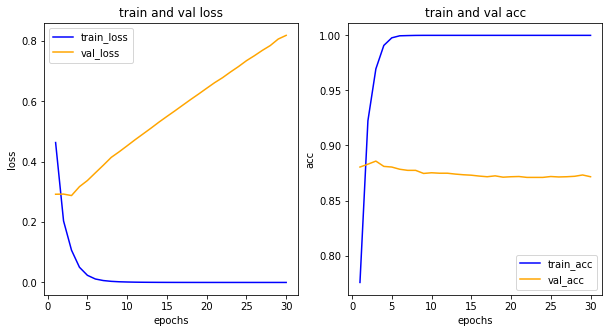

In [11]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig= plt.figure(figsize = (10,5))

#loss graph
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color = 'blue',label = 'train_loss')
ax1.plot(epochs,val_loss,color = 'orange',label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

#accuracy graph

ax2= fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color = 'blue',label='train_acc')
ax2.plot(epochs,val_acc,color = 'orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')

ax2.legend()

plt.show()


# --------------------------------------------------------------------------------------------------------------

#### -순환 신경망(RNN) 은 완전연결층,컨벌루션 신경망의 반대되는 개념
#### -완전연결층과 컨벌루젼 신경망은 피드 포워드 네트워크(feed-foward network)라고 표현
#### -피드 포워드 네트워크는 모든 출력값이 마지막층인 출력을 향함
#### -순환 신경망은 각 층의 결과값이 출력층을 향하면서도 동시에 현재 층의 다음 계산에 사용

# cos 함수를 이용하여 데이터 만들기
- 순환 신경망을 설명할 때, 수학에서 자주 접하는 sin, cos 함수를 사용하곤 한다
- 주기를 가진 함수의 형태가 시계열 데이터의 형태와 비슷한 모양을 보여주기 때문이다.

(361,)


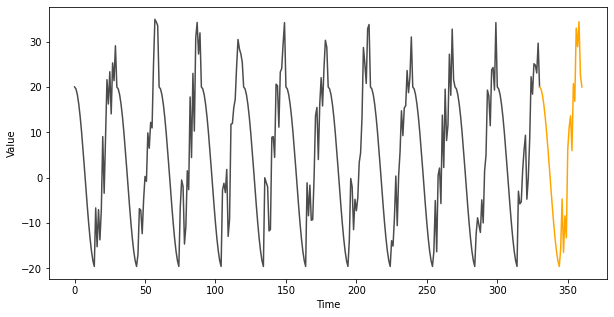

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30*12+1)

month_time = (time % 30)/30


# np.where(a > 15, True, False)
# a > 15 보다 큰 경우, True 그렇지 않으면 False 를 적용시킴

time_series = 20*np.where(month_time<0.5, 
                          np.cos(2*np.pi*month_time),
                          np.cos(2*np.pi*month_time) + np.random.random(361))



print(time_series.shape)
plt.figure(figsize= (10,5))
plt.xlabel('Time')
plt.ylabel('Value')

# 학습용 데이터
plt.plot(np.arange(0,30*11+1), 
         time_series[:30 * 11 +1], 
         color = 'black', alpha = 0.7)

#테스트용 데이터
plt.plot(np.arange(30*11,30*12+1), 
         time_series[30 * 11:], 
         color = 'orange')
                          

In [13]:
def make_sequence(time_series, n ):
    x_train,y_train = list(),list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i+n)]
        if(i+n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
            
        else:
            break
            
    return np.array(x_train),np.array(y_train)
        

n = 10 

x_train , y_train = make_sequence(time_series,10)

print(x_train.shape)
print(y_train.shape)


x_train = x_train.reshape(-1,n,1)
y_train = y_train.reshape(-1,1)

print(x_train.shape)
print(y_train.shape)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30*11]
patial_y_train = y_train[:30*11]

x_test = x_train[30*11:]
y_test = y_train[30*11:]

print('train:' , patial_x_train.shape,patial_y_train.shape)
print('test:' ,x_test.shape, y_test.shape)


(351, 10)
(351,)
(351, 10, 1)
(351, 1)
train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [14]:
test_arr = np.arange(100)
a,b = make_sequence(test_arr,10)

for i in range(1,4):
    print(a[i],'|',b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [15]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

#SimpleRNN층을 첫번째 층으로 사용하는 경우 반드시 input_shape 인자를 명시

model.add(SimpleRNN(units = 32, activation = 'tanh' , input_shape=(n,1)))
model.add(Dense(1,activation = 'linear'))
model.compile(optimizer = 'adam' , loss ='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train,y_train,epochs=200,batch_size = 12)

Epoch 1/200
30/30 [==============================] - 1s 14ms/step - loss: 279.1224
Epoch 2/200
30/30 [==============================] - 0s 15ms/step - loss: 224.5213
Epoch 3/200
30/30 [==============================] - 0s 14ms/step - loss: 207.1483
Epoch 4/200
30/30 [==============================] - 0s 14ms/step - loss: 203.2796
Epoch 5/200
30/30 [==============================] - 0s 14ms/step - loss: 152.4537
Epoch 6/200
30/30 [==============================] - 0s 14ms/step - loss: 143.3740
Epoch 7/200
30/30 [==============================] - 0s 14ms/step - loss: 130.8780
Epoch 8/200
30/30 [==============================] - 0s 14ms/step - loss: 127.0420
Epoch 9/200
30/30 [==============================] - 0s 14ms/step - loss: 111.6045
Epoch 10/200
30/30 [==============================] - 0s 14ms/step - loss: 104.1397
Epoch 11/200
30/30 [==============================] - 0s 14ms/step - loss: 100.2136
Epoch 12/200
30/30 [==============================] - 0s 14ms/step - loss: 97.9937
Ep

30/30 [==============================] - 0s 14ms/step - loss: 6.8526
Epoch 198/200
30/30 [==============================] - 0s 14ms/step - loss: 7.2263
Epoch 199/200
30/30 [==============================] - 0s 13ms/step - loss: 7.0758
Epoch 200/200
30/30 [==============================] - 0s 14ms/step - loss: 6.3103


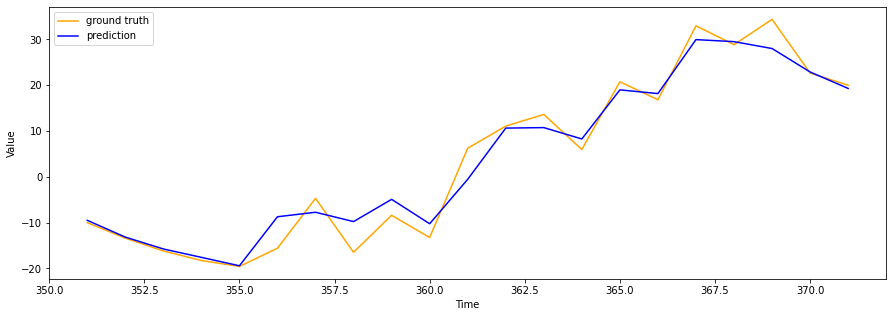

In [17]:
pred =model.predict(x_test)

pred_range = np.arange(len(y_train),len(y_train)+len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(pred_range, y_test.reshape(-1,), color = 'orange',label = 'ground truth')
plt.plot(pred_range,pred.reshape(-1,),color='blue',label='prediction')

plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------------------

# IMDB 데이터 셋 사용하여 RNN

In [28]:
from tensorflow.keras.datasets import imdb

num_words = 10000

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = num_words)


from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

max_len =500

pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_test = pad_sequences(X_test, maxlen = max_len)

model = Sequential()

model.add(Embedding(input_dim=num_words,output_dim=32))

"""
 return_sequences -> 출력 시퀀스의 마지막 출력을 반환할지 아니면 전체 시퀀스를 반환할지 여부
 return_sequences = True 일때 전체 상태 시퀀스를 반환
 return_sequences = False 일때 마지막 시점의 상태 시퀀스만 반환
 recurrent_dropout = 0 과 1 사이 부동소수점, 반복 상태의 선형 변환을 위해 드롭할 단위의 비율
""" 

model.add(SimpleRNN(32,return_sequences = True, dropout=0.15, recurrent_dropout=0.15))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])


model.summary()


history=model.fit(pad_X_train,y_train,batch_size=32, epochs = 15,validation_split = 0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
625/625 [==============================] - 612s 977ms/step - loss: 0.7030 - acc: 0.5088 - val_loss: 0.6986 - val_acc: 0.5068
Epoch 2/15
625/625 [==============================] - 611s 978ms/step - loss: 0.6921 - acc: 0.5271 - val_loss

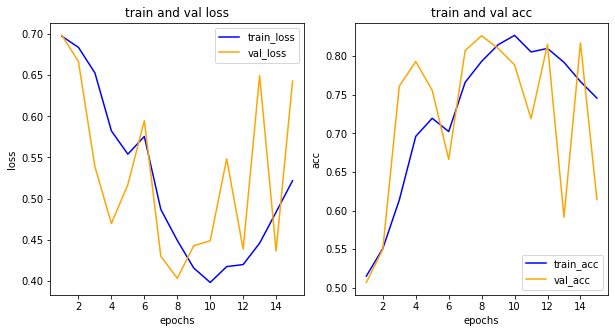

In [29]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig= plt.figure(figsize = (10,5))

#loss graph
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color = 'blue',label = 'train_loss')
ax1.plot(epochs,val_loss,color = 'orange',label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

#accuracy graph

ax2= fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color = 'blue',label='train_acc')
ax2.plot(epochs,val_acc,color = 'orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')

ax2.legend()

plt.show()


### SimpleRNN층의 출렵값 변화 확인하기

전체 시퀀스 반환 or 마지막 상태의 시퀀스 반환

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding


model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim=32))

# 전체 상태 시퀀스를 반환하거나,
# 마지막 시점의 상태 시퀀스만 반환합니다.
# 주석 바꾸면서 확인해 볼 것

model.add(SimpleRNN(32, return_sequences = True))
#model.add(SimpleRNN(32, return_sequences = False))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


# LSTM 
- SimpleRNN 층은 영화 리뷰와 같이 긴 문장의 데이터를 처리하기에는 문제가 존재
- 앞 부분의 존재하는 몇개의 시점은 기억할 수 있겠지만, 시점이 흐를수록 지속해서 기억을 하지못함
- 이때문에 대부분의 실제 환경에서 SimpleRNN층의 사용을 선호 X

- SimpleRNN층은 Dense층과 같이 기능적으로 매우 단순하게 구성되어 있어 깊이 쌓을수록 학습에 큰 문제가 존재
- 위 언급과 같이 "시점이 흐를수록 지속해서 기억하지 못한다" 라는 문장은 SimpleRNN층에 그래디언트 손실 문제가 존재한다는 것을 의미

#### 이를 해결하기 위해 고안된 것이 LSTM(Long Short-Term Memory)
#### LSTM 의 핵심적인 기능은 'Cell state' 를 통해 이전 정보를 계속해서 사용하여 그래디언트 손실 문제를 방지하는 것


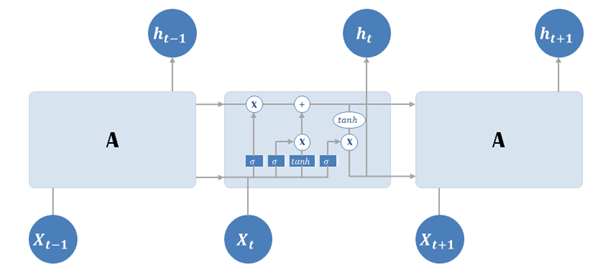

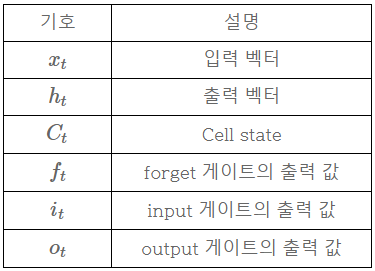

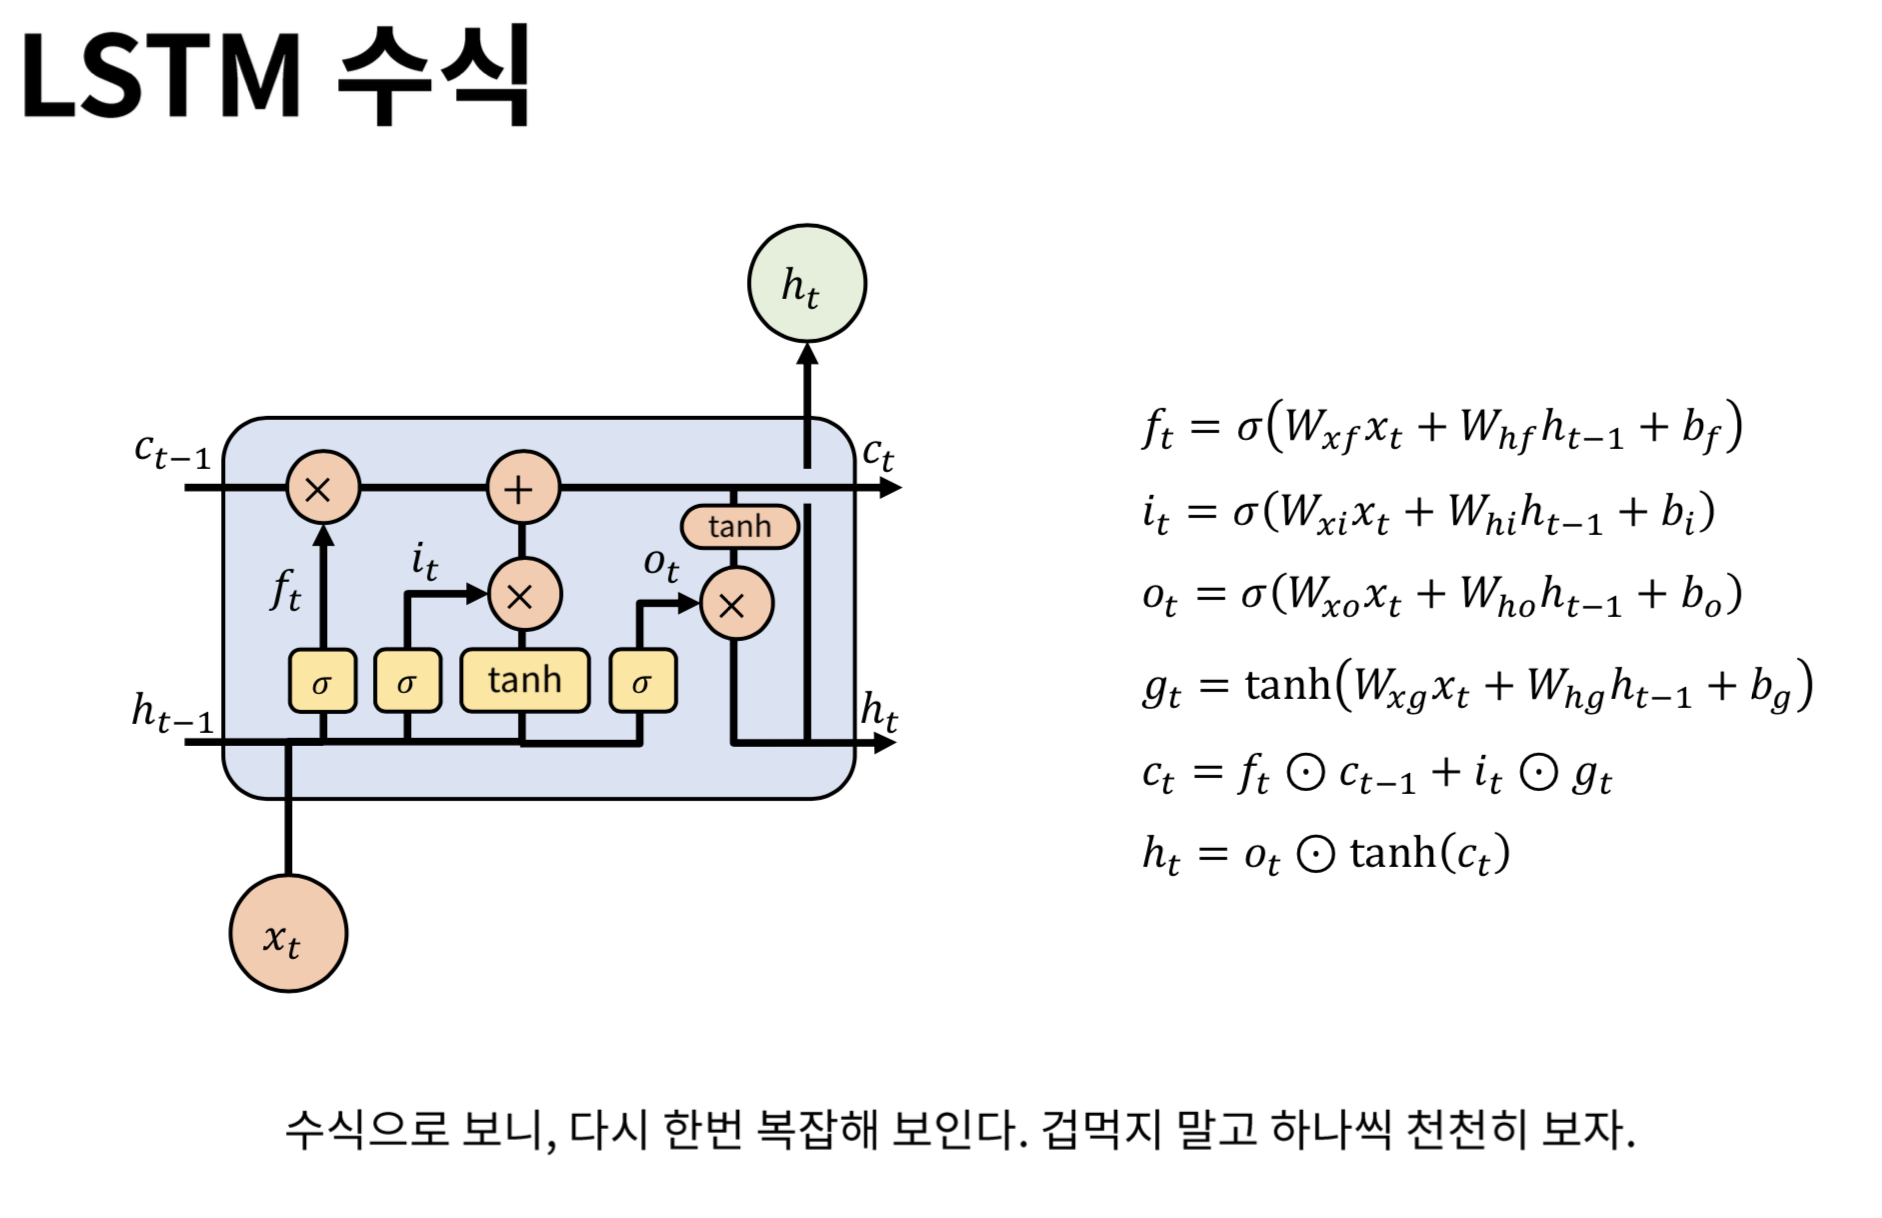

In [1]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)



In [2]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train,y_train), (X_test,y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


C:\Users\negga\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\negga\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train , maxlen = max_len)
pad_X_test = pad_sequences(X_test , maxlen = max_len)

print(len(pad_X_train[0]))

500


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding


model= Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64,return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46,activation = 'softmax'))

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(pad_X_train, y_train, batch_size =32 , epochs =20, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 13s 39ms/step - loss: 2.8203 - acc: 0.3434 - val_loss: 2.4093 - val_acc: 0.3450 - ETA: 0s - loss: 2.8291 - acc: 0.343 - ETA: 0s - loss: 2.8266 - acc: 0.3
Epoch 2/20
225/225 [==============================] - 8s 34ms/step - loss: 2.4183 - acc: 0.3537 - val_loss: 2.3983 - val_acc: 0.3450 2.4134 - acc: 0.3 - ETA: 5s - loss: 2.4141 - acc: 0.357 - ETA: 5s - loss: 2.4144 - acc: 0.3 - E - ETA: 0s - loss: 2.4187 - acc: 0. - ETA: 0s - loss: 2.4185 - acc: 0.35
Epoch 3/20
225/225 [==============================] - 8s 34ms/step - loss: 2.2285 - acc: 0.4118 - val_loss: 1.9092 - val_acc: 0.5019 loss: 2.3071 - acc: 0. - ETA: 3s - loss: 2.2992 - acc: 0.386 - E - ETA: 0s - loss: 2.2441 - acc: 0.40 - ETA: 0s - loss: 2.2417 
Epoch 4/20
225/225 [==============================] - 8s 34ms/step - loss: 1.8247 - acc: 0.5270 - val_loss: 1.7635 - val_acc: 0.5337
Epoch 5/20
225/225 [==============================] - 8s 35ms/step - loss: 1.6963 - acc: 0.5526 -

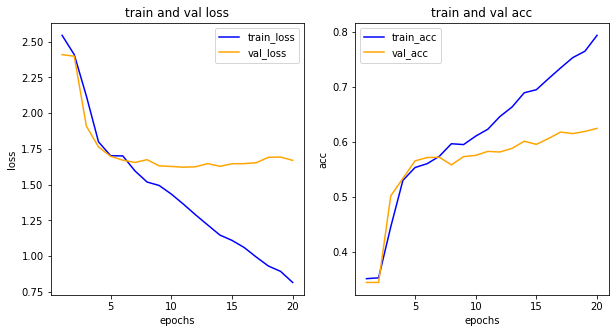

In [7]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig= plt.figure(figsize = (10,5))

#loss graph
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color = 'blue',label = 'train_loss')
ax1.plot(epochs,val_loss,color = 'orange',label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

#accuracy graph

ax2= fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color = 'blue',label='train_acc')
ax2.plot(epochs,val_acc,color = 'orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')

ax2.legend()

plt.show()

# Conv1D
- 시퀀스 데이터의 특징을 추출하기 위한 방법으로 1차원 형태의 컨벌루션 필터를 가진 층

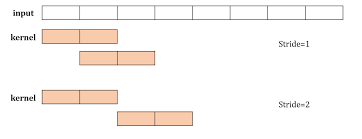

In [15]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


In [16]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train,y_train), (X_test,y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train , maxlen = max_len)
pad_X_test = pad_sequences(X_test , maxlen = max_len)

print(len(pad_X_train[0]))

500


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,GlobalMaxPooling1D,Flatten

model = Sequential()

model.add(Embedding(input_dim = num_words , output_dim = 32 , input_length = max_len))
model.add(Conv1D(32,7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32,5, activation = 'relu'))
model.add(MaxPooling1D(5))

#model.add(Flatten())
model.add(GlobalMaxPooling1D())

model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['acc'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 70, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [19]:
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 30 , validation_split=0.2)

Epoch 1/30
225/225 [==============================] - 2s 7ms/step - loss: -5155.1679 - acc: 0.0444 - val_loss: -166439.9375 - val_acc: 0.0456
Epoch 2/30
225/225 [==============================] - 2s 7ms/step - loss: -574625.7842 - acc: 0.0485 - val_loss: -3557422.5000 - val_acc: 0.0456
Epoch 3/30
225/225 [==============================] - 2s 7ms/step - loss: -6167160.2334 - acc: 0.0500 - val_loss: -18890012.0000 - val_acc: 0.0456
Epoch 4/30
225/225 [==============================] - 2s 7ms/step - loss: -26642684.7876 - acc: 0.0484 - val_loss: -59467792.0000 - val_acc: 0.0456
Epoch 5/30
225/225 [==============================] - 1s 7ms/step - loss: -75660679.6283 - acc: 0.0435 - val_loss: -139703504.0000 - val_acc: 0.0456
Epoch 6/30
225/225 [==============================] - 1s 7ms/step - loss: -167617624.0000 - acc: 0.0476 - val_loss: -276272320.0000 - val_acc: 0.0456
Epoch 7/30
225/225 [==============================] - 2s 7ms/step - loss: -314880292.6018 - acc: 0.0439 - val_loss: -48

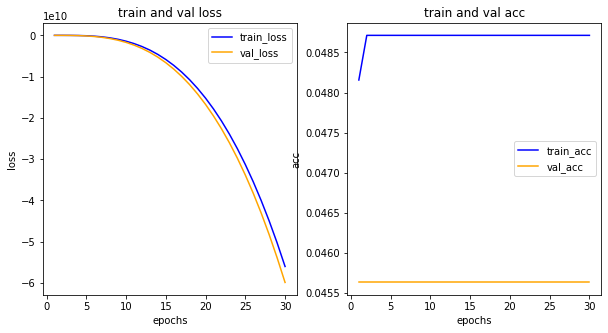

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig= plt.figure(figsize = (10,5))

#loss graph
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color = 'blue',label = 'train_loss')
ax1.plot(epochs,val_loss,color = 'orange',label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

#accuracy graph

ax2= fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color = 'blue',label='train_acc')
ax2.plot(epochs,val_acc,color = 'orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')

ax2.legend()

plt.show()

# Conv1D층과 LSTM층 혼합하여 사용하기

In [36]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30*12+1)

month_time = (time % 30)/30

time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2*np.pi *month_time),
                            np.cos(2*np.pi * month_time) + np.random.random(361))



def make_sequence(time_series, n):
    x_train, y_train = list(),list()
    
    for i in range(len(time_series)):
        x= time_series[i:(i+n)]
        if(i+n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
            
            
    return np.array(x_train), np.array(y_train)


n = 10

x_train, y_train = make_sequence(time_series,n)

x_train = x_train.reshape(-1,n,1)
y_train = y_train.reshape(-1,1)

#print(x_train, y_train)


from sklearn.model_selection import train_test_split


patial_x_train = x_train[:30*11]
patial_y_train = y_train[:30*11]

#print(patial_x_train,patial_y_train)

x_test = x_train[30*11:]
y_test = y_train[30*11:]

print('train : ',patial_x_train.shape,patial_y_train.shape)
print('test : ',x_test.shape, y_test.shape)


train :  (330, 10, 1) (330, 1)
test :  (21, 10, 1) (21, 1)


Epoch 1/200
11/11 [==============================] - 2s 20ms/step - loss: 226.7371 - mse: 226.7371
Epoch 2/200
11/11 [==============================] - 0s 19ms/step - loss: 229.1546 - mse: 229.1546
Epoch 3/200
11/11 [==============================] - 0s 20ms/step - loss: 199.8531 - mse: 199.8531
Epoch 4/200
11/11 [==============================] - 0s 19ms/step - loss: 173.8362 - mse: 173.8362
Epoch 5/200
11/11 [==============================] - 0s 19ms/step - loss: 164.6655 - mse: 164.6655
Epoch 6/200
11/11 [==============================] - 0s 20ms/step - loss: 139.5644 - mse: 139.5644
Epoch 7/200
11/11 [==============================] - 0s 20ms/step - loss: 136.7847 - mse: 136.7847
Epoch 8/200
11/11 [==============================] - 0s 20ms/step - loss: 126.4916 - mse: 126.4916
Epoch 9/200
11/11 [==============================] - 0s 19ms/step - loss: 105.0964 - mse: 105.0964
Epoch 10/200
11/11 [==============================] - 0s 19ms/step - loss: 117.4558 - mse: 117.4558
Epoch 11/

11/11 [==============================] - 0s 20ms/step - loss: 14.2307 - mse: 14.2307
Epoch 166/200
11/11 [==============================] - 0s 19ms/step - loss: 15.5832 - mse: 15.5832
Epoch 167/200
11/11 [==============================] - 0s 20ms/step - loss: 16.3861 - mse: 16.3861
Epoch 168/200
11/11 [==============================] - 0s 19ms/step - loss: 17.2085 - mse: 17.2085
Epoch 169/200
11/11 [==============================] - 0s 19ms/step - loss: 15.1492 - mse: 15.1492
Epoch 170/200
11/11 [==============================] - 0s 20ms/step - loss: 14.0091 - mse: 14.0091
Epoch 171/200
11/11 [==============================] - 0s 19ms/step - loss: 15.1096 - mse: 15.1096
Epoch 172/200
11/11 [==============================] - 0s 19ms/step - loss: 14.9854 - mse: 14.9854
Epoch 173/200
11/11 [==============================] - 0s 20ms/step - loss: 15.1316 - mse: 15.1316
Epoch 174/200
11/11 [==============================] - 0s 20ms/step - loss: 15.3332 - mse: 15.3332
Epoch 175/200
11/11 [===

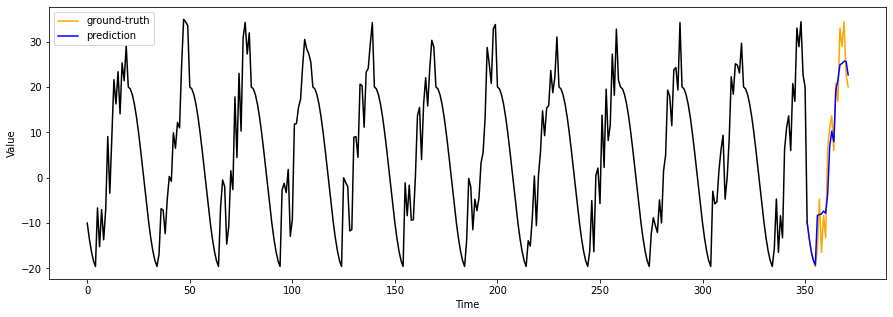

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM


model = Sequential()

model.add(Conv1D(32,3, activation = 'relu',input_shape=(10,1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32,3, activation ='relu'))

#LSTM 혼합 모델 구성

model.add(LSTM(32,dropout=0.2,recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse',metrics = ['mse'])

# 학습을 진행합니다.

model.fit(x_train,y_train, epochs =200, batch_size=32)

pred =model.predict(x_test)

#결과값 표출

train_range = np.arange(len(x_train)+1)
pred_range = np.arange(len(y_train),len(y_train)+len(pred))

plt.figure(figsize=(15,5))

plt.xlabel("Time")
plt.ylabel("Value")

plt.plot(train_range , np.append(y_train,y_test[0]),color = 'black')
plt.plot(pred_range , y_test , color = 'orange',label = 'ground-truth')
plt.plot(pred_range, pred, color = 'blue',label = 'prediction')

plt.legend()
plt.show()
    